In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Engines.optimisation_engine import get_wing_performance
import pandas as pd
import pygad
from config import (
    Performance_Data_Path,
    Planform_Coordinate_File,
    Station_1_Airfoil_Coordinate_File,
    Station_2_Airfoil_Coordinate_File,
    Station_3_Airfoil_Coordinate_File,
    Station_4_Airfoil_Coordinate_File,
    Station_5_Airfoil_Coordinate_File,
    Station_6_Airfoil_Coordinate_File,
    V_Free_Stream,
    Free_Stream_Speed_Base,
    Lift_Over_Drag_Base

)


2024-03-23 22:26:02.802765: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 22:26:02.802809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 22:26:02.804242: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 22:26:02.814184: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 22:26:03.852604: W tensorflow/compiler/tf2

/home/megi/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/megi/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Utility Functions

In [2]:
def generate_performance_plots(PerformanceFilePath):

    optimised_lift_to_drag_performance = np.loadtxt(PerformanceFilePath)
    plt.plot(
        V_Free_Stream,
        optimised_lift_to_drag_performance,
        label="Optimised",
        marker="o",
    )
    plt.plot(
        Free_Stream_Speed_Base,
        Lift_Over_Drag_Base,
        label="Baseline",
        marker="o",
    )
    plt.xlabel("Free stream speed [km/h]")
    plt.ylabel("Lift-to-drag ratio")
    plt.legend()
    plt.grid()
    plt.show(block=False)


def generate_and_dump_planform_plots(
    PlanformFilePath: str,
):

    wingspanincrements = np.insert(np.loadtxt(PlanformFilePath).T[2], 0, 0)
    l2 = np.cumsum(wingspanincrements)
    chord = np.insert(
        np.loadtxt(PlanformFilePath).T[0],
        5,
        np.loadtxt(PlanformFilePath).T[1][-1],
    )
    plt.plot(l2, chord, color="darkblue")
    plt.plot(-l2, chord, color="darkblue")
    plt.plot(
        [np.max(l2) for i in range(0, 50)],
        np.linspace(0, np.min(chord), 50),
        color="darkblue",
    )
    plt.plot(
        [np.min(-l2) for i in range(0, 50)],
        np.linspace(0, np.min(chord), 50),
        color="darkblue",
    )
    plt.plot(
        np.linspace(np.min(-l2), np.max(l2), 50),
        [0 for i in range(0, 50)],
        color="darkblue",
    )
    plt.axis("equal")
    plt.grid()
    plt.show(block=False)

    return


def generate_and_dump_airfoil_plot(AirfoilFilePath: str):
    plt.figure()
    plt.plot(np.loadtxt(AirfoilFilePath).T[0], np.loadtxt(AirfoilFilePath).T[1])
    plt.grid()
    plt.axis("equal")
    plt.xlabel("x/c")
    plt.ylabel("y/c")
    plt.title(AirfoilFilePath)
    plt.show(block=False)
    plt.clf()

# Load Optimisation Results

In [3]:
# # Saving the GA instance.
# filename = "Data\OptimisationData\genetic"  # The filename to which the instance is saved. The name is without extension.

# # Loading the saved GA instance.
# loaded_ga_instance = pygad.load(filename=filename)
# loaded_ga_instance.plot_fitness()

# Dump Best Performing Models

In [4]:

# get_wing_performance(


# ga_instance=loaded_ga_instance,


# solution=loaded_ga_instance.best_solution()[0],


# solution_idx=loaded_ga_instance.best_solution()[1])



# Generate Planform Plots

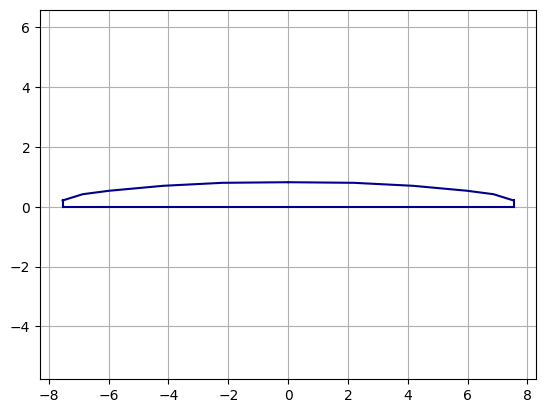

In [5]:
generate_and_dump_planform_plots(
    PlanformFilePath=Planform_Coordinate_File,
)

# Generate Airfoil Plots

In [6]:
Plot_Optimal = True

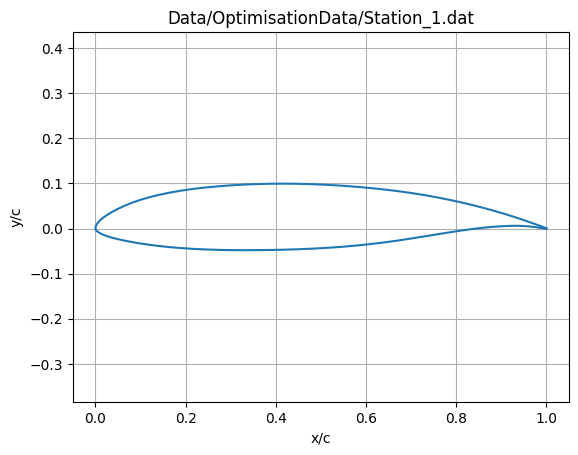

<Figure size 640x480 with 0 Axes>

In [7]:
if Plot_Optimal:

    generate_and_dump_airfoil_plot(
        AirfoilFilePath="Data/OptimisationData/Station_1.dat"
    ) 

else:

    generate_and_dump_airfoil_plot(AirfoilFilePath=Station_1_Airfoil_Coordinate_File)

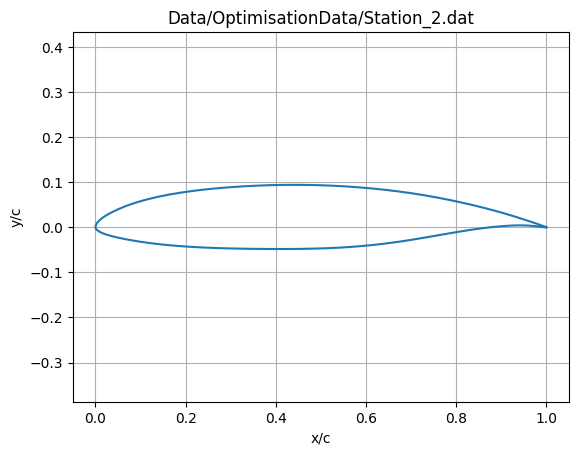

<Figure size 640x480 with 0 Axes>

In [8]:
if Plot_Optimal:
    generate_and_dump_airfoil_plot(
        AirfoilFilePath="Data/OptimisationData/Station_2.dat"
    )

else:

    generate_and_dump_airfoil_plot(AirfoilFilePath=Station_2_Airfoil_Coordinate_File)

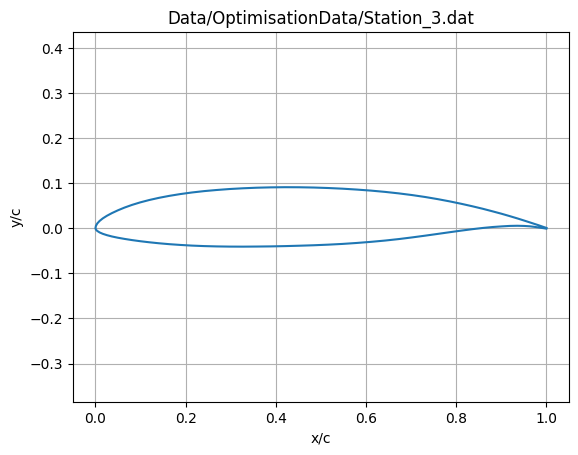

<Figure size 640x480 with 0 Axes>

In [9]:
if Plot_Optimal:
    generate_and_dump_airfoil_plot(
        AirfoilFilePath="Data/OptimisationData/Station_3.dat"
    )

else:

    generate_and_dump_airfoil_plot(AirfoilFilePath=Station_3_Airfoil_Coordinate_File)

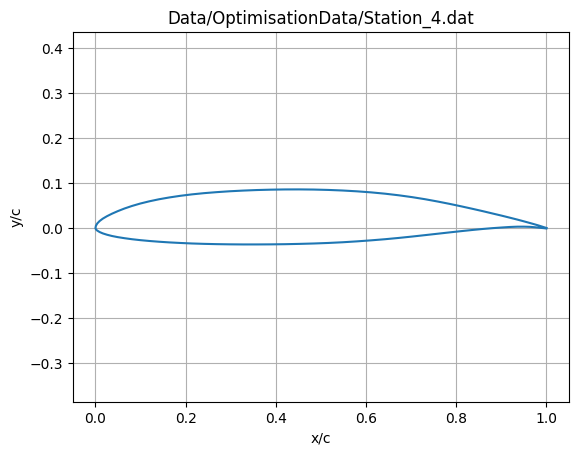

<Figure size 640x480 with 0 Axes>

In [10]:
if Plot_Optimal:
    generate_and_dump_airfoil_plot(
        AirfoilFilePath="Data/OptimisationData/Station_4.dat"
    )  

else:

    generate_and_dump_airfoil_plot(AirfoilFilePath=Station_4_Airfoil_Coordinate_File)

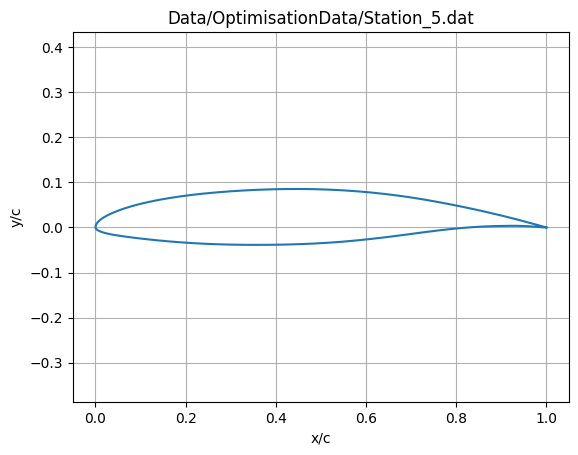

<Figure size 640x480 with 0 Axes>

In [11]:
if Plot_Optimal:

    generate_and_dump_airfoil_plot(
        AirfoilFilePath="Data/OptimisationData/Station_5.dat"
    )
else:
    generate_and_dump_airfoil_plot(AirfoilFilePath=Station_5_Airfoil_Coordinate_File)

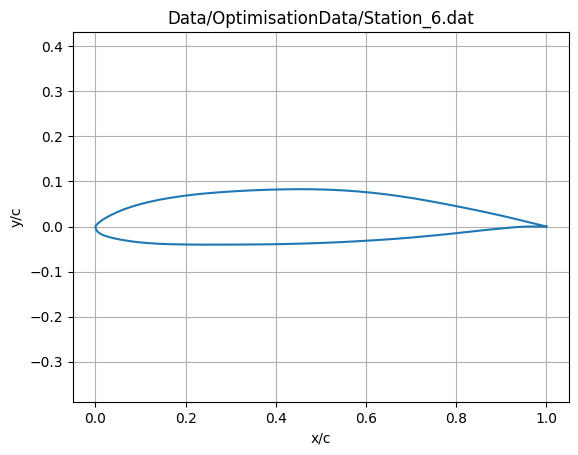

<Figure size 640x480 with 0 Axes>

In [12]:
if Plot_Optimal:
    generate_and_dump_airfoil_plot(
        AirfoilFilePath="Data/OptimisationData/Station_6.dat"
    )
else:
    generate_and_dump_airfoil_plot(AirfoilFilePath=Station_6_Airfoil_Coordinate_File)

# Generate Performance Plots

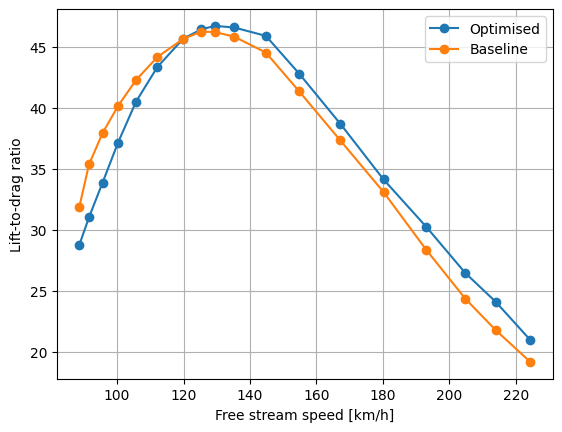

In [13]:
generate_performance_plots(PerformanceFilePath=Performance_Data_Path)

# Adhoc

In [14]:
def airfoil_quality_penalty(X:np.array, Y: np.array, weight = 1e3):
        
    
        x_upper = X[0 : int(len(X) / 2 + 1)]
        y_upper = Y[0 : int(len(X) / 2 + 1)]

        x_lower = X[int(len(X) / 2) :]
        y_lower = Y[int(len(X) / 2) :]

        """# Determine Critical Curvature Points"""

        grad_top = []
        grad_bot = []
        top_grad_change = []
        bot_grad_change = []

        for i in range(1, len(x_upper)):
            grad_top.append(((y_upper[i - 1] - y_upper[i]) / (x_upper[i - 1] - x_upper[i])))
            grad_bot.append(((y_lower[i - 1] - y_lower[i]) / (x_lower[i - 1] - x_lower[i])))

        for i in range(1, len(grad_top)):
            if ((grad_top[i] < 0) & (grad_top[i - 1] > 0)) or (
                (grad_top[i] > 0) & (grad_top[i - 1] < 0)
            ):
                top_grad_change.append(i)
            if ((grad_bot[i] < 0) & (grad_bot[i - 1] > 0)) or (
                (grad_bot[i] > 0) & (grad_bot[i - 1] < 0)
            ):
                bot_grad_change.append(i)

        return grad_top, grad_bot, top_grad_change, bot_grad_change

In [15]:
# X = np.loadtxt(Station_1_Airfoil_Coordinate_File).T[0]
# Y = np.loadtxt(Station_1_Airfoil_Coordinate_File).T[1]

X = np.loadtxt("Data/OptimisationData/Station_6.dat").T[0]
Y = np.loadtxt("Data/OptimisationData/Station_6.dat").T[1]


In [16]:
grad_top, grad_bot, top_grad_change, bot_grad_change = airfoil_quality_penalty(X,
                        Y, 
                        weight = 1e3)

In [17]:
x_upper = X[0 : int(len(X) / 2 + 1)]
y_upper = Y[0 : int(len(X) / 2 + 1)]

x_lower = X[int(len(X) / 2) :]
y_lower = Y[int(len(X) / 2) :]

In [18]:
bot_grad_change

[16, 43, 46, 47, 48]

In [19]:
top_grad_change

[26]

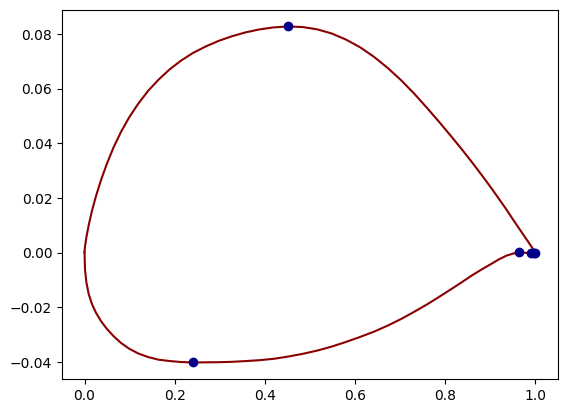

In [20]:
# Plot top and bottom critical points

plt.plot(x_upper,y_upper, c="darkred", label="Sampled")
plt.plot(x_lower,y_lower, c="darkred")
for tp in top_grad_change:
    plt.plot(x_upper[tp],y_upper[tp], "o", c="darkblue")
for bp in bot_grad_change:
    plt.plot(x_lower[bp],y_lower[bp], "o", c="darkblue")
# plt.axis("equal")
plt.show()

# Smooth Airfoil

In [21]:
from aerosandbox.geometry.airfoil.airfoil_families import get_kulfan_parameters, get_kulfan_coordinates

In [22]:
for i in range(1,7):
    X = np.loadtxt(F"Data/OptimisationData/Station_{i}.dat").T[0]
    Y = np.loadtxt(F"Data/OptimisationData/Station_{i}.dat").T[1]
    stack = np.vstack([X,Y]).T
    wte =get_kulfan_parameters(coordinates=stack)
    crds = get_kulfan_coordinates(lower_weights=wte["lower_weights"], 
                              upper_weights=wte["upper_weights"], 
                              TE_thickness=wte["TE_thickness"], 
                              leading_edge_weight=wte["leading_edge_weight"],
                              n_points_per_side=100)
    np.savetxt(X=crds,fname=F"/home/megi/Station_{i}_Smooth.dat")

# Run Comparative Analysis (Ad-hoc)

In [23]:
import pyfoil

In [39]:
st_6_opt  = pyfoil.Airfoil.import_from_dat("/home/megi/Station_5_Smooth.dat").resample(170)
st_6_base = pyfoil.Airfoil.import_from_dat("/home/megi/Downloads/Airfoil_Station_5_smooth.dat").resample(170)

In [40]:
aoa_start = -25
aoa_stop=25
steps = 30
df_6_opt = st_6_opt.xfoil_polar(aoa_start=aoa_start, aoa_end=aoa_stop, steps=steps, degree=True)
df_6_base = st_6_base.xfoil_polar(aoa_start=aoa_start, aoa_end=aoa_stop, steps=steps, degree=True)

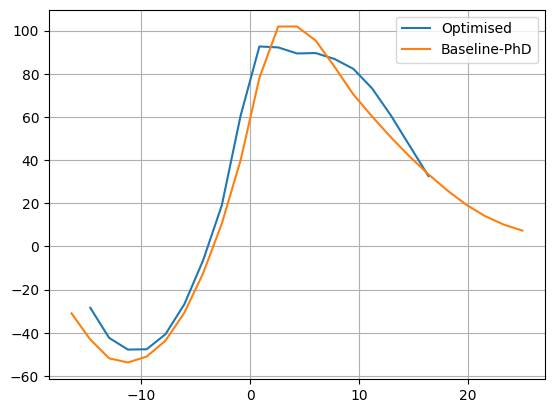

In [41]:
plt.plot(df_6_opt["aoa"], df_6_opt["cl"]/df_6_opt["cd"], label="Optimised")
plt.plot(df_6_base["aoa"], df_6_base["cl"]/df_6_base["cd"], label="Baseline-PhD")
plt.grid()
plt.legend()
plt.show()